### Imports

In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import torch
from torchvision.utils import make_grid
from torchvision.transforms.functional import to_pil_image

In [2]:
# change the path to root C:\Users\appel\Documents\Project\synthetic-image-segmentation\
root = 'C:\\Users\\appel\\Documents\\Project\\synthetic-image-segmentation\\'
os.chdir(root)

In [3]:
def convert_to_pil_image(batch):
    for cam in batch:
        row = make_grid(cam, nrow=cam.shape[0], padding=10, normalize=True)
        combined_grid = torch.cat((combined_grid, row), dim=1) if 'combined_grid' in locals() else row
    return to_pil_image(combined_grid)

# Unpaired

In [4]:
from src.datasets.unpaired import UnpairedDataset, UnpairedDataModule
from src.datasets.unity import UnityDataset
from src.datasets.nyudv2 import NYUDv2Dataset
from src.datasets.bdsd500 import BDSD500Dataset

In [5]:
dataset_a = UnityDataset(epoch_length=100, port=8093, crop_size=(448, 448))
# dataset_a = BDSD500Dataset(r'C:\Users\appel\Documents\Project\synthetic-image-segmentation\data\real\bdsd500', size=(321, 321))
dataset_b = NYUDv2Dataset(r'C:\Users\appel\Documents\Project\synthetic-image-segmentation\data\real\nyudv2', crop_size=(448, 448))

In [6]:
unpaireddataset = UnpairedDataset(dataset_a, dataset_b, mode='train', fuse_A=False) #fuse_A=(0,2))
unpaireddatamodule = UnpairedDataModule(unpaireddataset, batch_size=5, num_workers=0, shuffle=True)

Found 100 images of trainA and 1449 images of trainB


torch.Size([5, 3, 448, 448]) torch.Size([5, 3, 448, 448])


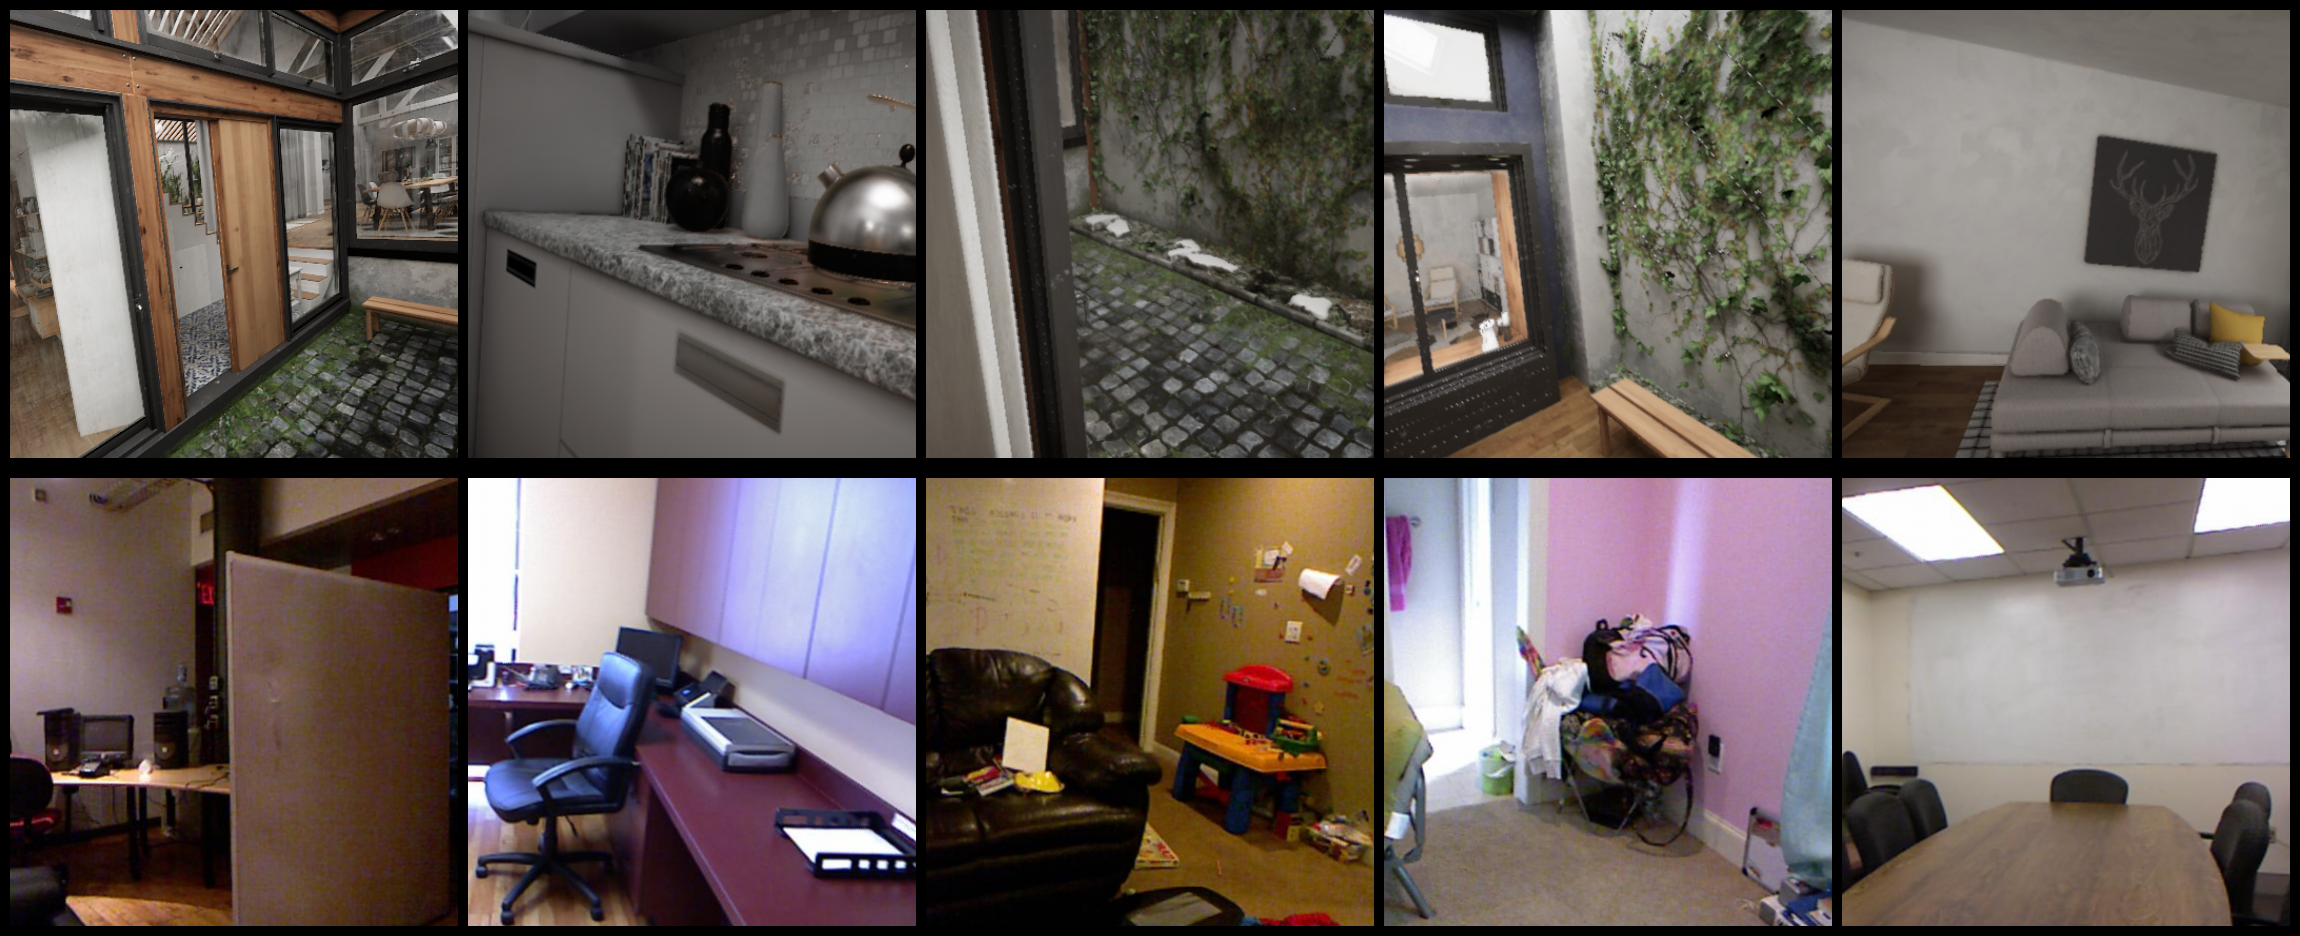

In [7]:
for batch in unpaireddatamodule.train_dataloader():
    print(batch['A'].shape, batch['B'].shape)
    pil_image = convert_to_pil_image([batch['A'], batch['B']])
    break

pil_image

# Unity

In [8]:
from src.datasets.unity import UnityDataset, UnityDataModule

In [9]:
unitydataset = UnityDataset(epoch_length=100, port=8093, crop_size=(448, 448))
unitydatamodule = UnityDataModule(unitydataset, batch_size=5, num_workers=0, shuffle=True)

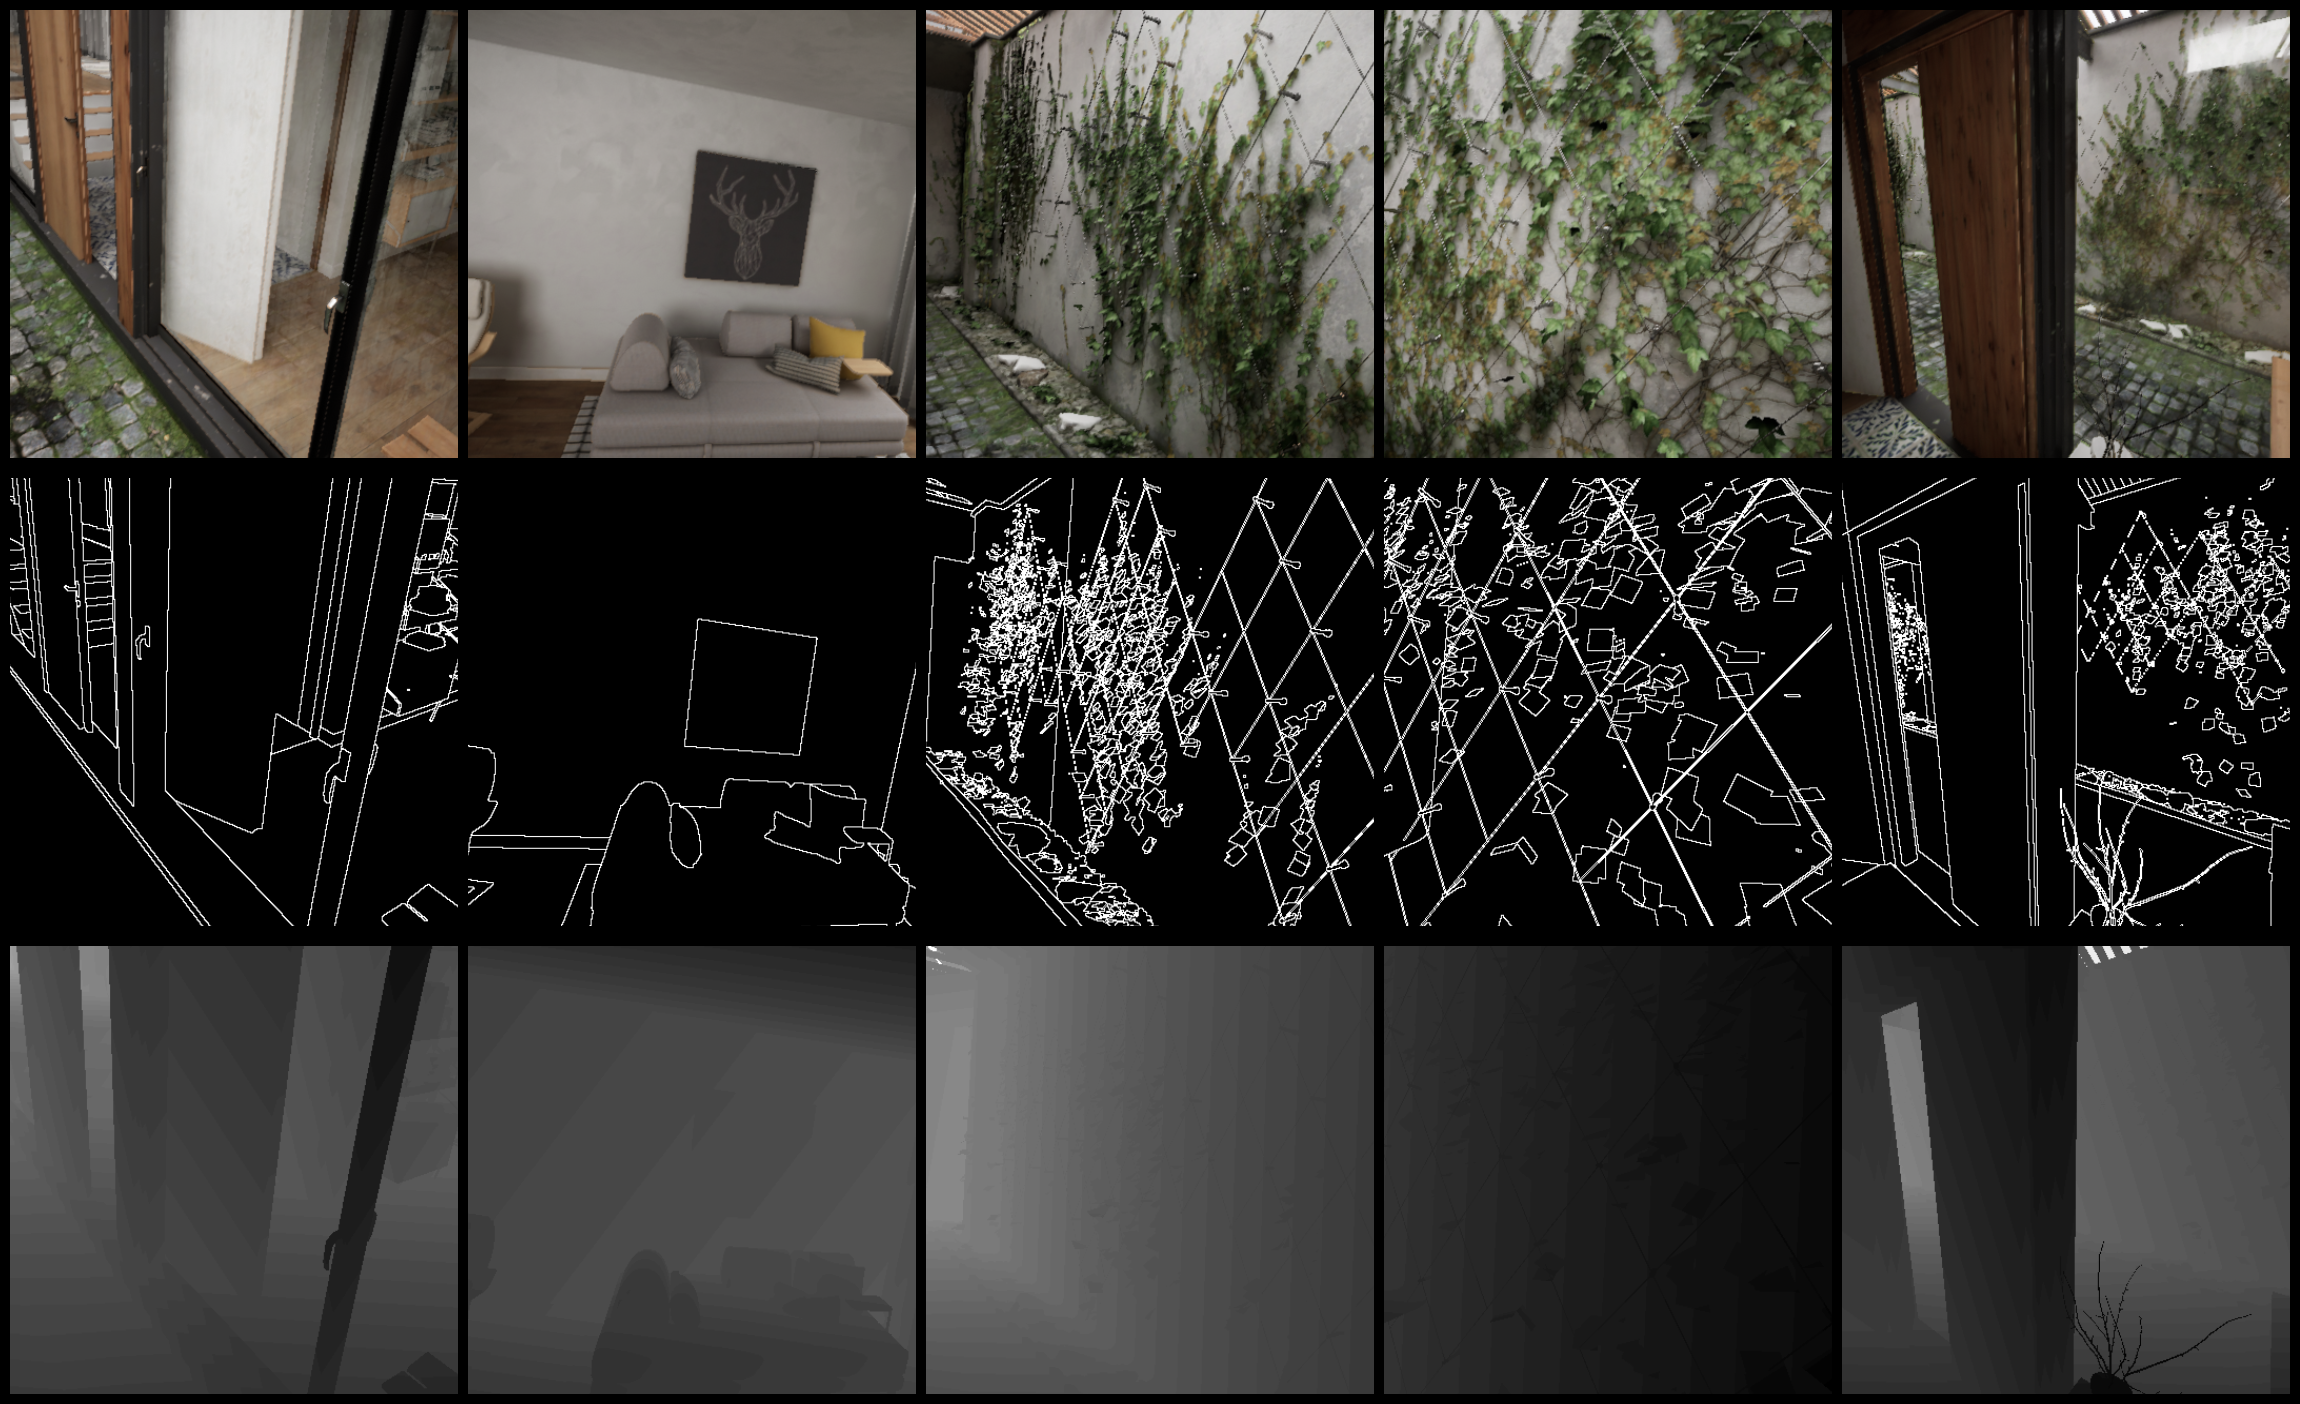

In [10]:
for batch in unitydatamodule.train_dataloader():
    pil_image = convert_to_pil_image(batch)
    break

pil_image

# NYUDv2

In [11]:
from src.datasets.nyudv2 import NYUDv2Dataset, NYUDv2DataModule

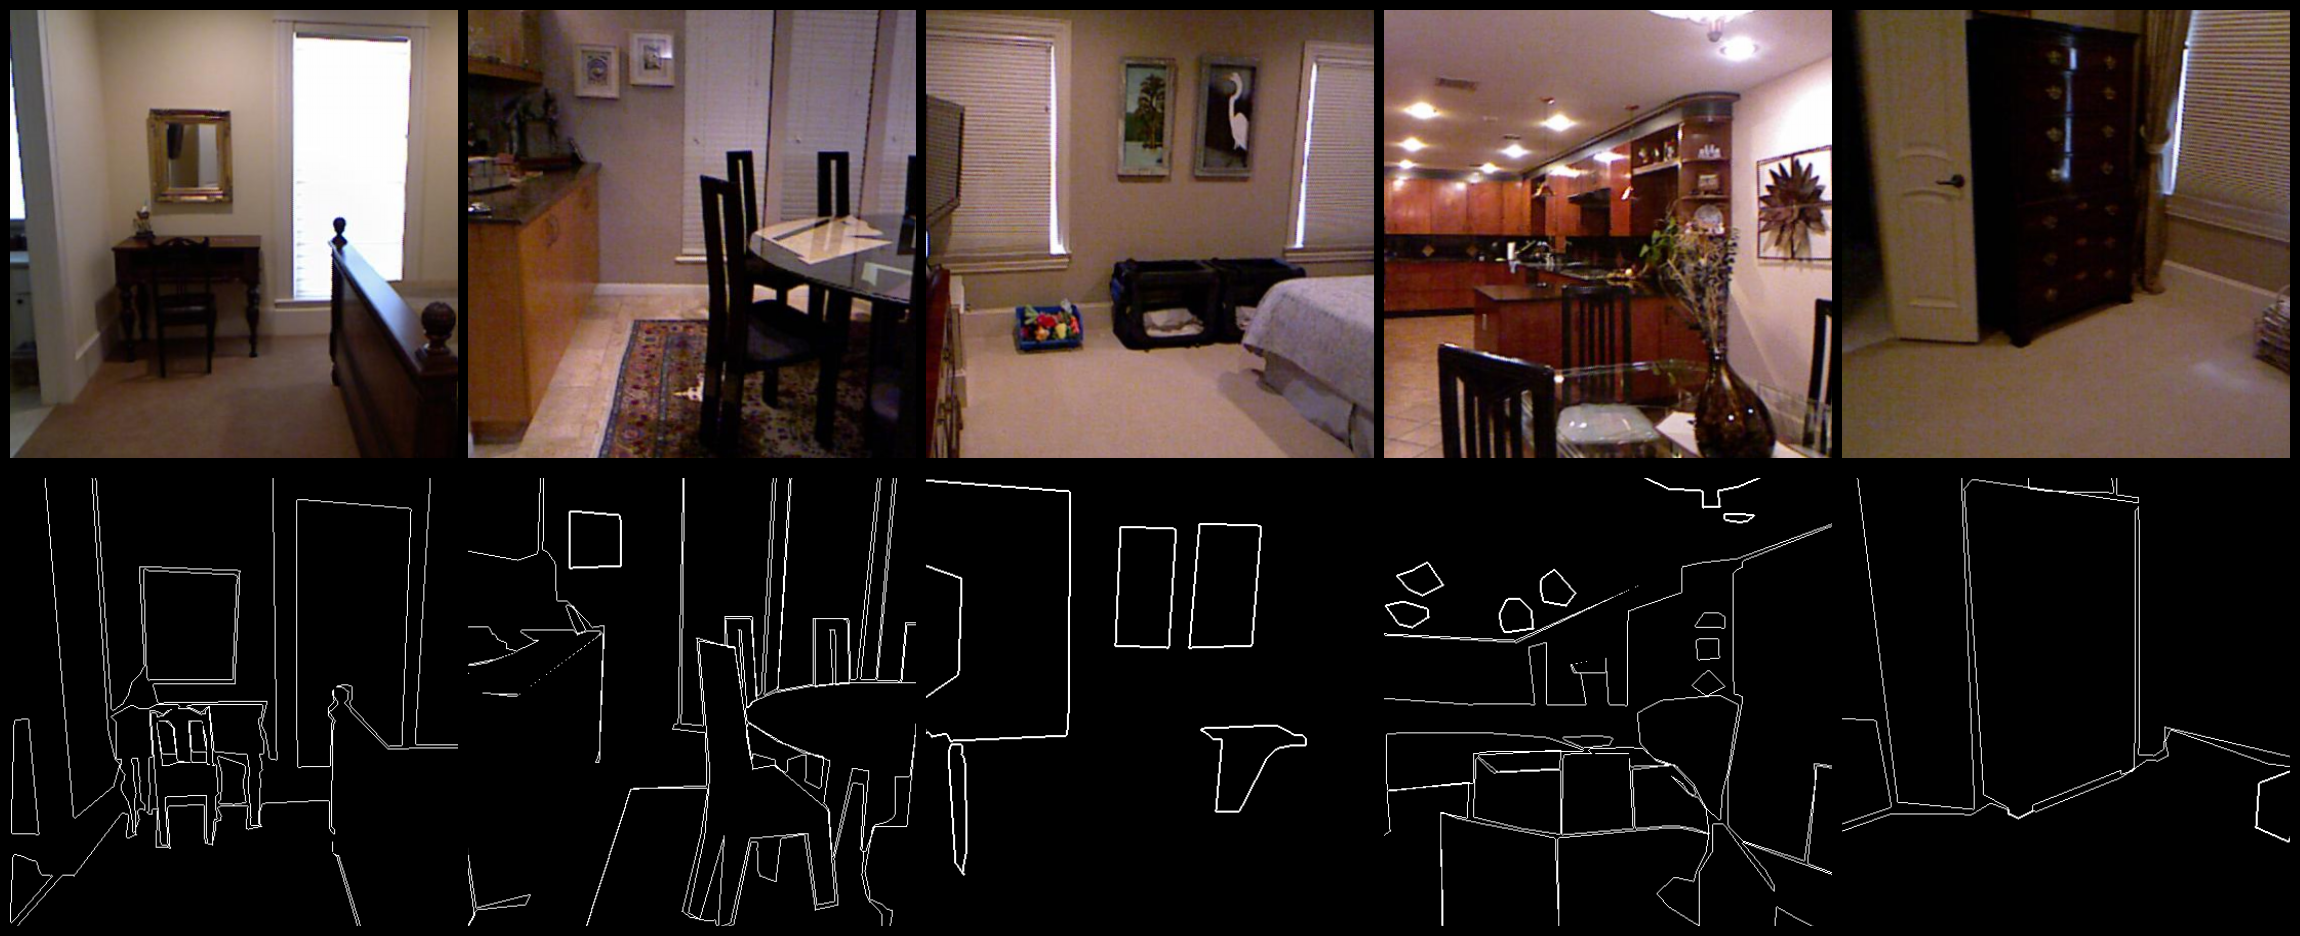

In [14]:
nyudv2dataset = NYUDv2Dataset(data_root=r'C:\Users\appel\Documents\Project\synthetic-image-segmentation\data\real\nyudv2', crop_size=(448, 448))
nyudv2datamodule = NYUDv2DataModule(nyudv2dataset, batch_size=5, num_workers=0, shuffle=True)
our_dataloader = nyudv2datamodule.train_dataloader()

for batch in our_dataloader:
    pil_image = convert_to_pil_image(batch)
    break

pil_image

# BDSD500

In [16]:
from bdsd500 import BDSD500Dataset, BDSD500DataModule

In [20]:
bdsd500dataset = BDSD500Dataset(data_root=r'C:\Users\appel\Documents\Project\synthetic-image-segmentation\data\real\bdsd500', crop_size=(321, 321))
bdsd500datamodule = BDSD500DataModule(bdsd500dataset, batch_size=5, num_workers=0, shuffle=True)

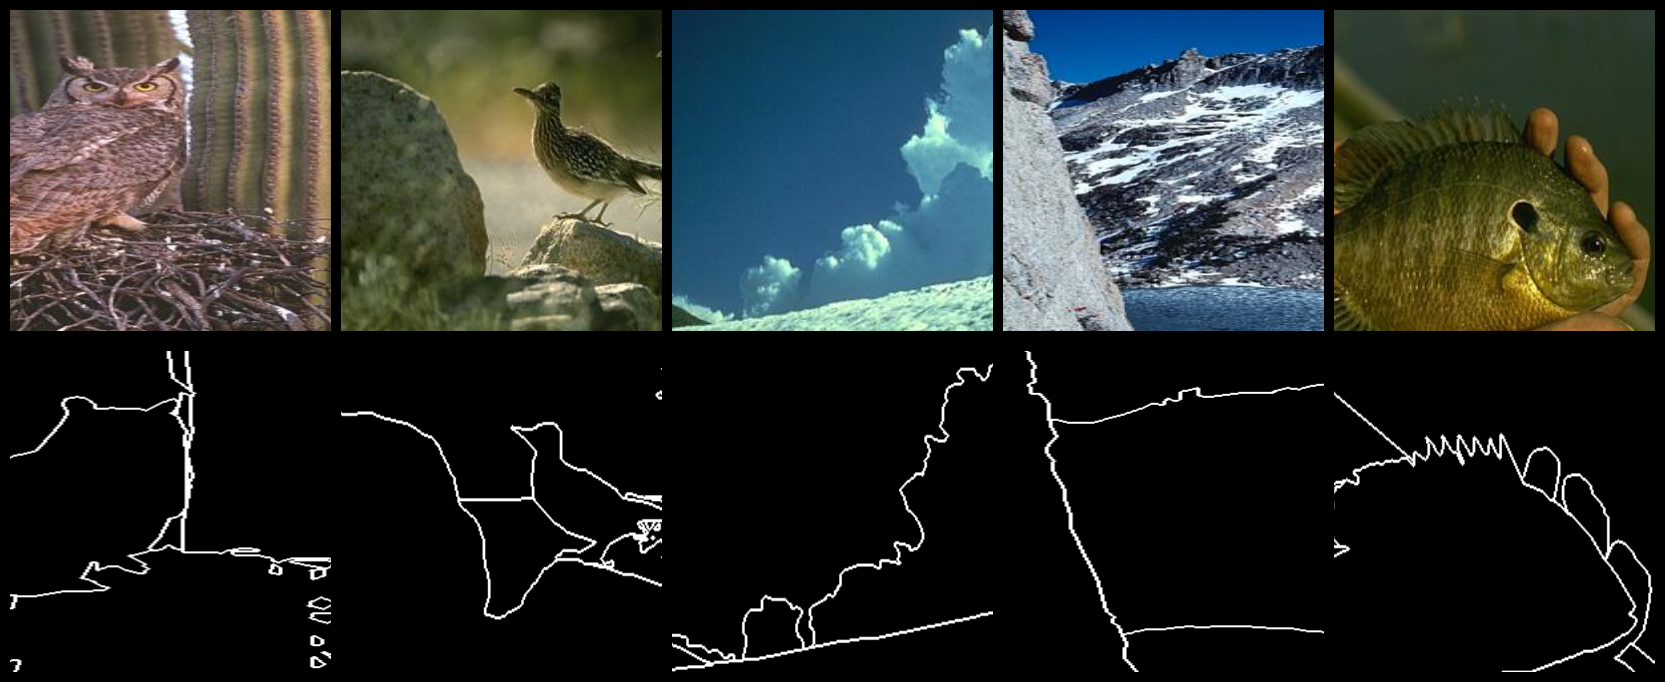

In [21]:
for batch in bdsd500datamodule.train_dataloader():
    pil_image = convert_to_pil_image(batch)
    break

pil_image